# Activity 1.2 : Training Neural Networks


#### Objective(s):

This activity aims to demonstrate how to train neural networks using keras

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train neural networks
* Demonstrate how to evaluate and plot the model using training and validation loss


#### Resources:
* Jupyter Notebook

CI Pima Diabetes Dataset

* pima-indians-diabetes.csv


#### Procedures

Load the necessary libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

%matplotlib inline

In [ ]:
## Import Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

Load the dataset

In [ ]:
filepath = "/content/drive/MyDrive/Data Science 3 Datasets/pima-indians-diabetes.csv"
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin",
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv(filepath, names=names)

Check the top 5 samples of the data

In [ ]:
print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
638,7,97,76,32,91,40.9,0.871,32,1
67,2,109,92,0,0,42.7,0.845,54,0
550,1,116,70,28,0,27.4,0.204,21,0
164,0,131,88,0,0,31.6,0.743,32,1
191,9,123,70,44,94,33.1,0.374,40,0


In [ ]:
diabetes_df.dtypes

times_pregnant              int64
glucose_tolerance_test      int64
blood_pressure              int64
skin_thickness              int64
insulin                     int64
bmi                       float64
pedigree_function         float64
age                         int64
has_diabetes                int64
dtype: object

In [ ]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

Split the data to Train, and Test (75%, 25%)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

In [ ]:
np.mean(y), np.mean(1-y)

(0.3489583333333333, 0.6510416666666666)

Build a single hidden layer neural network using 12 nodes.
Use the sequential model with single layer network and input shape to 8.



Normalize the data

In [ ]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

Define the model:
* Input size is 8-dimensional
* 1 hidden layer, 12 hidden nodes, sigmoid activation
* Final layer with one node and sigmoid activation (standard for binary classification)

In [ ]:
model  = Sequential([
    Dense(12, input_shape=(8,), activation="relu"),
    Dense(1, activation="sigmoid")
])

View the model summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train the model
* Compile the model with optimizer, loss function and metrics
* Use the fit function to return the run history.


In [ ]:
model.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)

Epoch 1/200
18/18 [==============================] - 1s 17ms/step - loss: 0.7235 - accuracy: 0.5642 - val_loss: 0.6955 - val_accuracy: 0.5208
Epoch 2/200
18/18 [==============================] - 0s 5ms/step - loss: 0.6869 - accuracy: 0.5833 - val_loss: 0.6661 - val_accuracy: 0.6042
Epoch 3/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6576 - accuracy: 0.6302 - val_loss: 0.6429 - val_accuracy: 0.6406
Epoch 4/200
18/18 [==============================] - 0s 4ms/step - loss: 0.6339 - accuracy: 0.6632 - val_loss: 0.6245 - val_accuracy: 0.6823
Epoch 5/200
18/18 [==============================] - 0s 5ms/step - loss: 0.6146 - accuracy: 0.6736 - val_loss: 0.6097 - val_accuracy: 0.6875
Epoch 6/200
18/18 [==============================] - 0s 5ms/step - loss: 0.5987 - accuracy: 0.6806 - val_loss: 0.5975 - val_accuracy: 0.6979
Epoch 7/200
18/18 [==============================] - 0s 5ms/step - loss: 0.5855 - accuracy: 0.7066 - val_loss: 0.5874 - val_accuracy: 0.7240
Epoch 8/200


In [ ]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.
y_pred_class_nn_1 = (model.predict(X_test_norm)> 0.5 ).astype('int32')
y_pred_prob_nn_1 = model.predict(X_test_norm)

6/6 [==============================] - 0s 4ms/step


In [ ]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]

array([[1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0]], dtype=int32)

In [ ]:
y_pred_prob_nn_1[:10]

array([[0.62997013],
       [0.5020282 ],
       [0.28853026],
       [0.17203137],
       [0.1602998 ],
       [0.53444177],
       [0.02254321],
       [0.32344955],
       [0.9509052 ],
       [0.18956077]], dtype=float32)

Create the plot_roc function

In [ ]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name),
           xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])


Evaluate the model performance and plot the ROC CURVE

accuracy is 0.771
roc-auc is 0.828


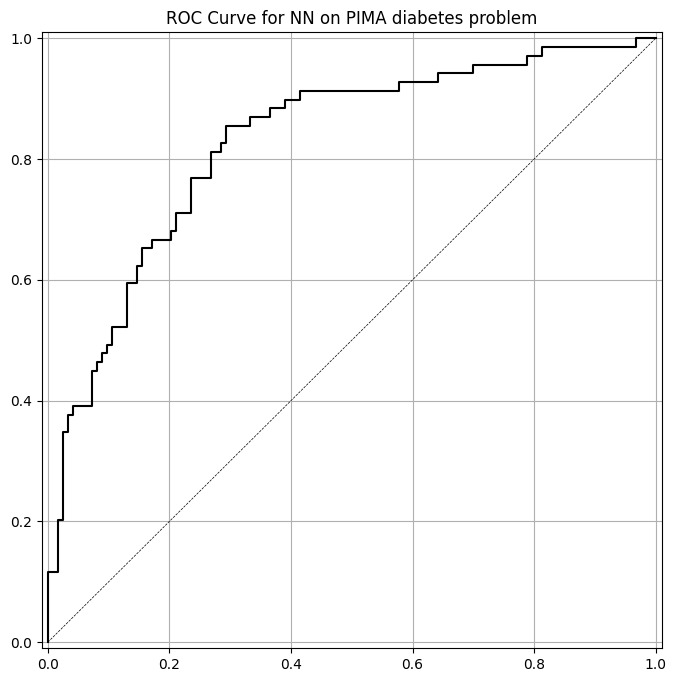

In [ ]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

We can observe that the model has a gradual increase in accuracy, which can be viewed as our graph goes towards the right side, it becomes closer and close to 1.0

 Plot the training loss and the validation loss over the different epochs and see how it looks

In [ ]:
run_hist_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

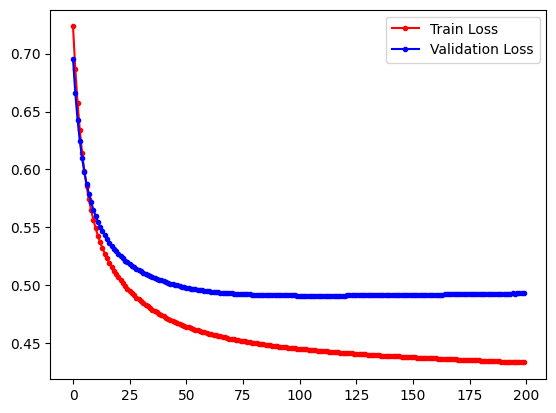

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

What is your interpretation about the result of the train and validation loss?

#### Supplementary Activity

* Build a model with two hidden layers, each with 6 nodes
* Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
* Use a learning rate of .003 and train for 1500 epochs
* Graph the trajectory of the loss functions, accuracy on both train and test set
* Plot the roc curve for the predictions
* Use different learning rates, numbers of epochs, and network structures.
* Plot the results of training and validation loss using different learning rates, number of epocgs and network structures
* Interpret your result

#  Using the same dataset as the one above

In [ ]:
#Model with two hidden layers each having 6 nodes
model_1 = Sequential ([
    #Layer 1
    Dense(6, input_shape=(8,),activation="relu"),
    #Layer 2
    Dense(6,activation="relu"),
    #Output/Final Layer
    Dense(1,activation="sigmoid")
])

In [ ]:
model_1.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_2 = model_1.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500)

Epoch 1/1500
18/18 [==============================] - 1s 11ms/step - loss: 0.4756 - accuracy: 0.7587 - val_loss: 0.5307 - val_accuracy: 0.7344
Epoch 2/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.4746 - accuracy: 0.7604 - val_loss: 0.5302 - val_accuracy: 0.7344
Epoch 3/1500
18/18 [==============================] - 0s 5ms/step - loss: 0.4737 - accuracy: 0.7622 - val_loss: 0.5297 - val_accuracy: 0.7344
Epoch 4/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.4728 - accuracy: 0.7656 - val_loss: 0.5292 - val_accuracy: 0.7396
Epoch 5/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.4721 - accuracy: 0.7674 - val_loss: 0.5287 - val_accuracy: 0.7396
Epoch 6/1500
18/18 [==============================] - 0s 5ms/step - loss: 0.4713 - accuracy: 0.7708 - val_loss: 0.5282 - val_accuracy: 0.7396
Epoch 7/1500
18/18 [==============================] - 0s 5ms/step - loss: 0.4704 - accuracy: 0.7708 - val_loss: 0.5277 - val_accuracy: 0.7396
Epoch

In [ ]:
model_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 6)                 54        
                                                                 
 dense_19 (Dense)            (None, 6)                 42        
                                                                 
 dense_20 (Dense)            (None, 1)                 7         
                                                                 
Total params: 103 (412.00 Byte)
Trainable params: 103 (412.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
y_pred_class_nn_1 = (model_1.predict(X_test_norm)> 0.5 ).astype('int32')
y_pred_prob_nn_1 = model_1.predict(X_test_norm)

6/6 [==============================] - 0s 2ms/step


In [ ]:
run_hist_2.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

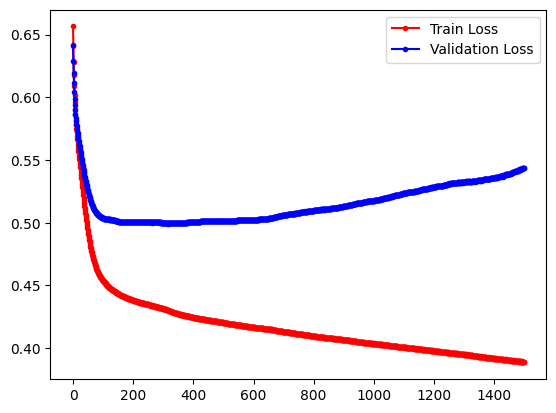

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_2.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_2.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

We can see that there is a significant different between the training loss and the valdation loss. With validation loss only going above 50% but the training loss to go all the way below 40%

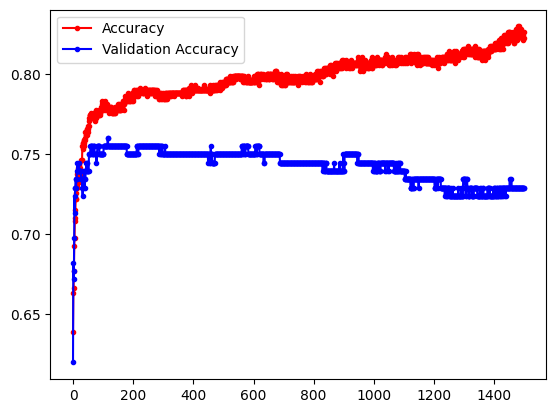

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_2.history["accuracy"],'r', label="Accuracy")
ax.plot(run_hist_2.history["val_accuracy"],'b', label="Validation Accuracy")
ax.legend()

In contrast to this the accuracy of the training set was alot higher than those in the testing set or rather the validation accuracy.

accuracy is 0.729
roc-auc is 0.800


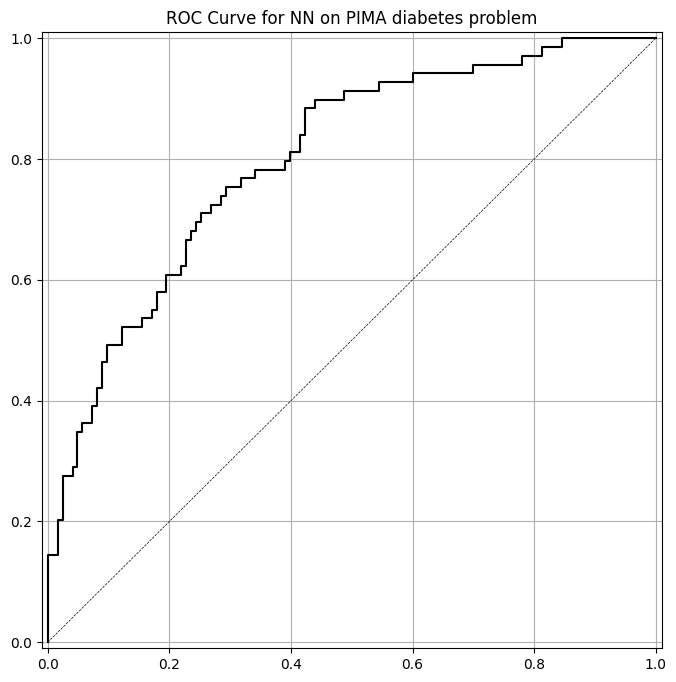

In [ ]:
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

Additional Layer (Different Number of Node for the additional Layer), Same Number of Epochs

In [ ]:
#Model with two hidden layers each having 6 nodes
model_2 = Sequential ([
    #Layer 1
    Dense(8, input_shape=(8,),activation="relu"),

    #Layer 2
    Dense(8,activation="relu"),

    #Layer 3
    #For this part of the activity, I wanted to see if adding another layer
    #and having a different number of node would affect the accuracy or
    #would it remain stagnant.
    Dense(8,activation="relu"),

    #Output/Final Layer
    Dense(1,activation="sigmoid")
])
y_pred_class_nn_1 = (model_2.predict(X_test_norm)> 0.5 ).astype('int32')
y_pred_prob_nn_1 = model_2.predict(X_test_norm)

model_2.compile(SGD(lr = .001), "binary_crossentropy", metrics=["accuracy"])
run_hist_3 = model_2.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=800)

6/6 [==============================] - 0s 2ms/step


Epoch 1/800
18/18 [==============================] - 1s 13ms/step - loss: 0.6627 - accuracy: 0.6719 - val_loss: 0.6583 - val_accuracy: 0.6719
Epoch 2/800
18/18 [==============================] - 0s 5ms/step - loss: 0.6516 - accuracy: 0.6632 - val_loss: 0.6506 - val_accuracy: 0.6458
Epoch 3/800
18/18 [==============================] - 0s 4ms/step - loss: 0.6430 - accuracy: 0.6528 - val_loss: 0.6448 - val_accuracy: 0.6406
Epoch 4/800
18/18 [==============================] - 0s 5ms/step - loss: 0.6362 - accuracy: 0.6545 - val_loss: 0.6401 - val_accuracy: 0.6406
Epoch 5/800
18/18 [==============================] - 0s 5ms/step - loss: 0.6305 - accuracy: 0.6545 - val_loss: 0.6362 - val_accuracy: 0.6406
Epoch 6/800
18/18 [==============================] - 0s 4ms/step - loss: 0.6255 - accuracy: 0.6545 - val_loss: 0.6328 - val_accuracy: 0.6406
Epoch 7/800
18/18 [==============================] - 0s 4ms/step - loss: 0.6210 - accuracy: 0.6545 - val_loss: 0.6299 - val_accuracy: 0.6406
Epoch 8/800


Analysis:

Additional Layer (same number of node for the additional layer), Same Number of Epochs

In [ ]:
#Model with two hidden layers each having 6 nodes
model_3= Sequential ([
    #Layer 1
    Dense(6, input_shape=(8,),activation="relu"),

    #Layer 2
    Dense(8,activation="relu"),

    #Layer 3
    #For this part of the activity, I wanted to see if adding another layer
    #and having a different number of node would affect the accuracy or
    #would it remain stagnant.
    Dense(8,activation="relu"),

    #Output/Final Layer
    Dense(1,activation="sigmoid")
])

model_3.compile(SGD(lr = .001), "binary_crossentropy", metrics=["accuracy"])
run_hist_4 = model_3.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=800)

Epoch 1/800
18/18 [==============================] - 1s 21ms/step - loss: 0.7004 - accuracy: 0.5799 - val_loss: 0.7045 - val_accuracy: 0.5521
Epoch 2/800
18/18 [==============================] - 0s 4ms/step - loss: 0.6924 - accuracy: 0.6146 - val_loss: 0.6981 - val_accuracy: 0.6094
Epoch 3/800
18/18 [==============================] - 0s 6ms/step - loss: 0.6856 - accuracy: 0.6389 - val_loss: 0.6926 - val_accuracy: 0.6198
Epoch 4/800
18/18 [==============================] - 0s 7ms/step - loss: 0.6799 - accuracy: 0.6476 - val_loss: 0.6876 - val_accuracy: 0.6354
Epoch 5/800
18/18 [==============================] - 0s 4ms/step - loss: 0.6748 - accuracy: 0.6493 - val_loss: 0.6832 - val_accuracy: 0.6354
Epoch 6/800
18/18 [==============================] - 0s 5ms/step - loss: 0.6703 - accuracy: 0.6545 - val_loss: 0.6791 - val_accuracy: 0.6354
Epoch 7/800
18/18 [==============================] - 0s 5ms/step - loss: 0.6663 - accuracy: 0.6580 - val_loss: 0.6753 - val_accuracy: 0.6406
Epoch 8/800


Analysis:

Different Epochs

In [ ]:
#Model with two hidden layers each having 6 nodes
model_4 = Sequential([
    #Layer 1
    Dense(4, input_shape=(8,),activation="relu"),

    #Layer 2
    Dense(10,activation="relu"),

    #Output/Final Layer
    Dense(1,activation="sigmoid")
])

model_4.compile(SGD(lr = .5), "binary_crossentropy", metrics=["accuracy"])
run_hist_5 = model_4.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1000)

Epoch 1/1000
18/18 [==============================] - 1s 13ms/step - loss: 0.8195 - accuracy: 0.3472 - val_loss: 0.8341 - val_accuracy: 0.3490
Epoch 2/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.7797 - accuracy: 0.3802 - val_loss: 0.7962 - val_accuracy: 0.3802
Epoch 3/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.7506 - accuracy: 0.4149 - val_loss: 0.7681 - val_accuracy: 0.3490
Epoch 4/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.7288 - accuracy: 0.4531 - val_loss: 0.7466 - val_accuracy: 0.4010
Epoch 5/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.7121 - accuracy: 0.4878 - val_loss: 0.7301 - val_accuracy: 0.4115
Epoch 6/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.6992 - accuracy: 0.5382 - val_loss: 0.7173 - val_accuracy: 0.4375
Epoch 7/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.6890 - accuracy: 0.5573 - val_loss: 0.7071 - val_accuracy: 0.5052
Epoch

In [ ]:
#Model with 10 nodes with 4 Layers
model_5 = Sequential([
    #Layer 1
    Dense(8, input_shape=(8,),activation="relu"),

    #Layer 3
    Dense(8,activation="relu"),

    #Layer 4
    Dense(6,activation="relu"),

    #Output/Final Layer
    Dense(1,activation="sigmoid")
])

model_5.compile(SGD(lr = .5), "binary_crossentropy", metrics=["accuracy"])
run_hist_6 = model_5.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=500)

Epoch 1/500
18/18 [==============================] - 1s 13ms/step - loss: 0.6868 - accuracy: 0.6441 - val_loss: 0.6961 - val_accuracy: 0.6042
Epoch 2/500
18/18 [==============================] - 0s 4ms/step - loss: 0.6796 - accuracy: 0.6510 - val_loss: 0.6898 - val_accuracy: 0.6406
Epoch 3/500
18/18 [==============================] - 0s 5ms/step - loss: 0.6729 - accuracy: 0.6545 - val_loss: 0.6841 - val_accuracy: 0.6458
Epoch 4/500
18/18 [==============================] - 0s 4ms/step - loss: 0.6666 - accuracy: 0.6562 - val_loss: 0.6786 - val_accuracy: 0.6458
Epoch 5/500
18/18 [==============================] - 0s 4ms/step - loss: 0.6606 - accuracy: 0.6528 - val_loss: 0.6735 - val_accuracy: 0.6406
Epoch 6/500
18/18 [==============================] - 0s 5ms/step - loss: 0.6549 - accuracy: 0.6545 - val_loss: 0.6686 - val_accuracy: 0.6458
Epoch 7/500
18/18 [==============================] - 0s 4ms/step - loss: 0.6491 - accuracy: 0.6545 - val_loss: 0.6639 - val_accuracy: 0.6406
Epoch 8/500


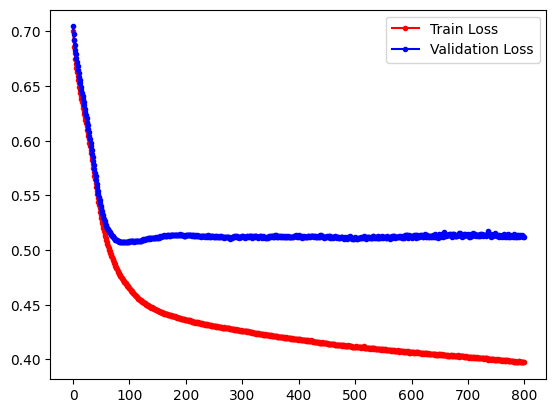

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_4.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_4.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

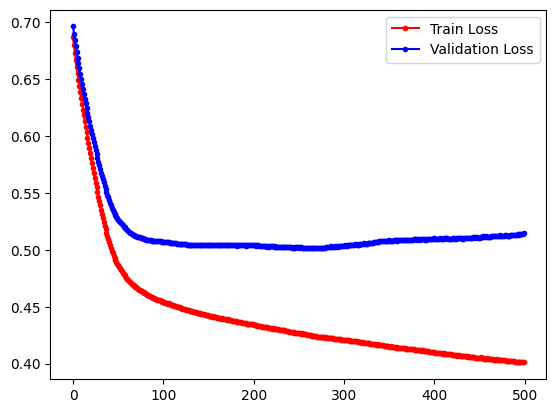

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_6.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_6.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

#With the Loan_data dataset

In [ ]:
model_2=pd.read_csv('/content/drive/MyDrive/Data Science (3rd Year 1st Sem)/loan_data.csv')
model_2

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [ ]:
model_2.drop(columns="purpose",axis=1,inplace=True)

In [ ]:
model_2

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [ ]:
#Model with two hidden layers each having 6 nodes
model_2 = Sequential ([
    #Layer 1
    Dense(6, input_shape=(8,),activation="relu"),
    #Layer 2
    Dense(4,activation="relu"),
    #Output/Final Layer
    Dense(1,activation="sigmoid")
])

In [ ]:
model_2.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_7 = model_1.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=500)

Epoch 1/500
18/18 [==============================] - 0s 9ms/step - loss: 0.3523 - accuracy: 0.8333 - val_loss: 0.6519 - val_accuracy: 0.7448
Epoch 2/500
18/18 [==============================] - 0s 5ms/step - loss: 0.3521 - accuracy: 0.8333 - val_loss: 0.6515 - val_accuracy: 0.7448
Epoch 3/500
18/18 [==============================] - 0s 7ms/step - loss: 0.3520 - accuracy: 0.8316 - val_loss: 0.6528 - val_accuracy: 0.7448
Epoch 4/500
18/18 [==============================] - 0s 5ms/step - loss: 0.3517 - accuracy: 0.8351 - val_loss: 0.6544 - val_accuracy: 0.7396
Epoch 5/500
18/18 [==============================] - 0s 5ms/step - loss: 0.3520 - accuracy: 0.8385 - val_loss: 0.6527 - val_accuracy: 0.7448
Epoch 6/500
18/18 [==============================] - 0s 4ms/step - loss: 0.3519 - accuracy: 0.8281 - val_loss: 0.6499 - val_accuracy: 0.7448
Epoch 7/500
18/18 [==============================] - 0s 5ms/step - loss: 0.3525 - accuracy: 0.8333 - val_loss: 0.6499 - val_accuracy: 0.7448
Epoch 8/500
1

In [ ]:
model_2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 6)                 54        
                                                                 
 dense_33 (Dense)            (None, 4)                 28        
                                                                 
 dense_34 (Dense)            (None, 1)                 5         
                                                                 
Total params: 87 (348.00 Byte)
Trainable params: 87 (348.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
y_pred_class_nn_1 = (model_2.predict(X_test_norm)> 0.5 ).astype('int32')
y_pred_prob_nn_1 = model_2.predict(X_test_norm)

6/6 [==============================] - 0s 3ms/step


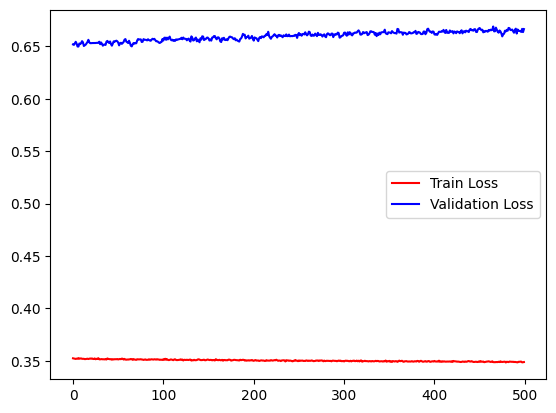

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_7.history["loss"],'r', label="Train Loss")
ax.plot(run_hist_7.history["val_loss"],'b', label="Validation Loss")
ax.legend()

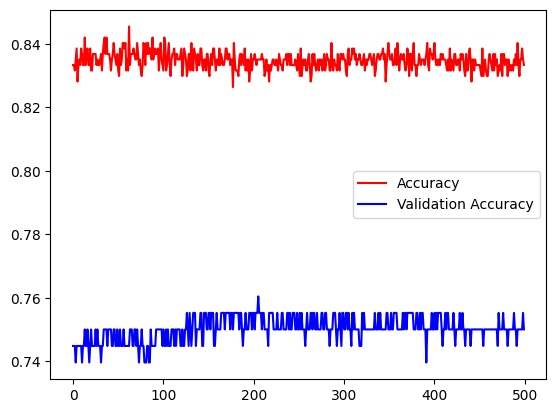

In [ ]:
fig, ax = plt.subplots()
ax.plot(run_hist_7.history["accuracy"],'r', label="Accuracy")
ax.plot(run_hist_7.history["val_accuracy"],'b', label="Validation Accuracy")
ax.legend()

# Conclusion and Google Colab Link

Google Colab

https://colab.research.google.com/drive/1SFq6drAAp1V8pLIw_szpF1l-EeoKx26D?usp=sharing